In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

In [20]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


# Forest regression starts here

In [21]:
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head(10))

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [22]:
X_test = testing_data
y_test = []
display(X_test.head(), y_test)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

In [23]:
forest1 = RandomForestRegressor()
forest1.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [24]:
sns.set_context("paper")
sns.set_style("ticks")

# Initial Random Forest Model Prediction for 50% of missing housing data with base params



In [25]:
print("model score on training data:", forest1.score(X_train, y_train))
y_predicted = forest1.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.981751606506041


array([126723.08, 154714.5 , 178546.74, ..., 160649.59, 108327.  ,
       229788.4 ])

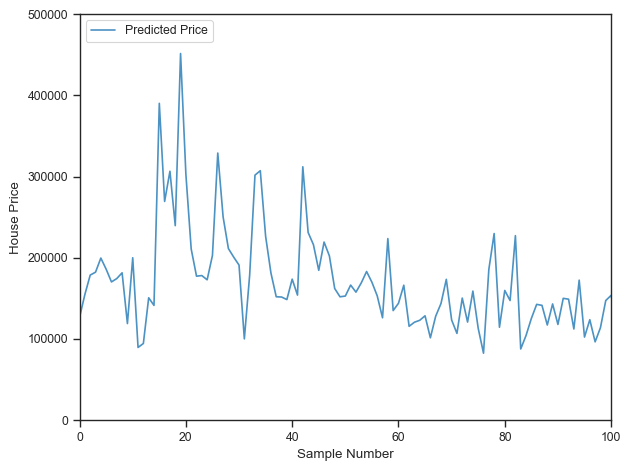

In [26]:
cmn.plot_observed_vs_predicted(predicted=y_predicted)

### Feature selection on Training Data

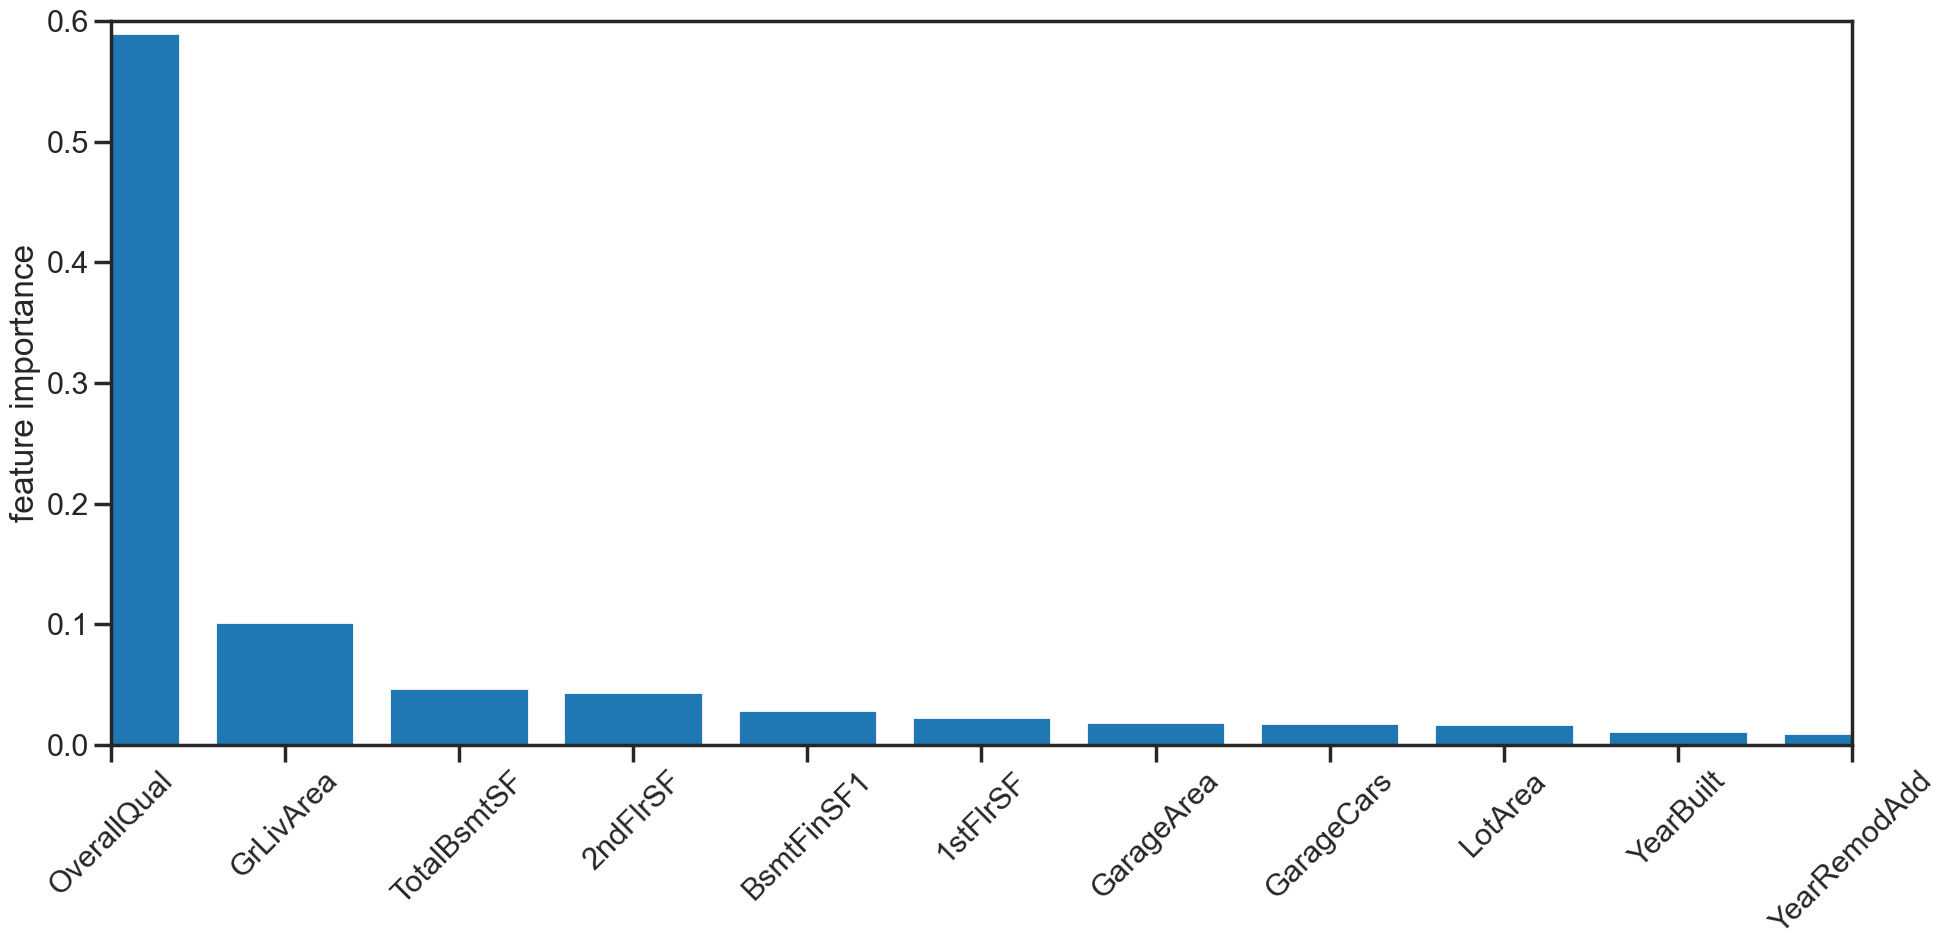

In [27]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_feature_importance(x_val=X_train, regressor=forest1, x_lim=10)

# Reverse Forest 50:50 split to verify the accuracy of the prediction

In [28]:
forest = RandomForestRegressor()
forest.fit(X_test, y_predicted)

RandomForestRegressor()

In [29]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 0.9969091307967352
model score on test data: 0.8574466748344012


In [30]:
y_train_predicted = forest.predict(X_train)
y_train_predicted

array([194971.217 , 164383.0803, 216777.9398, ..., 257813.7443,
       130414.9442, 148020.5029])

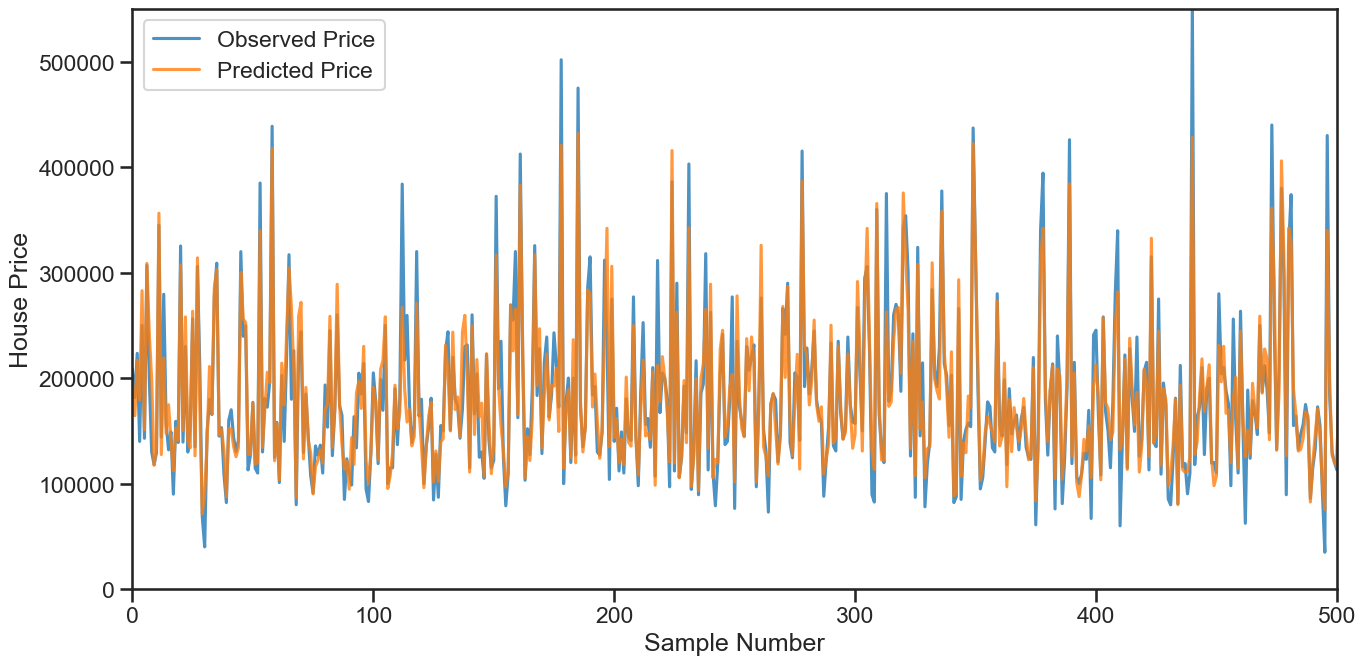

In [31]:
sns.set_context("talk")
sns.set_style("ticks")
cmn.plot_observed_vs_predicted(observed=y_train, predicted=y_train_predicted, x_lim=500,y_lim=550000, size_of_fig=(14,7))

### Feature Selection on reverse 50:50

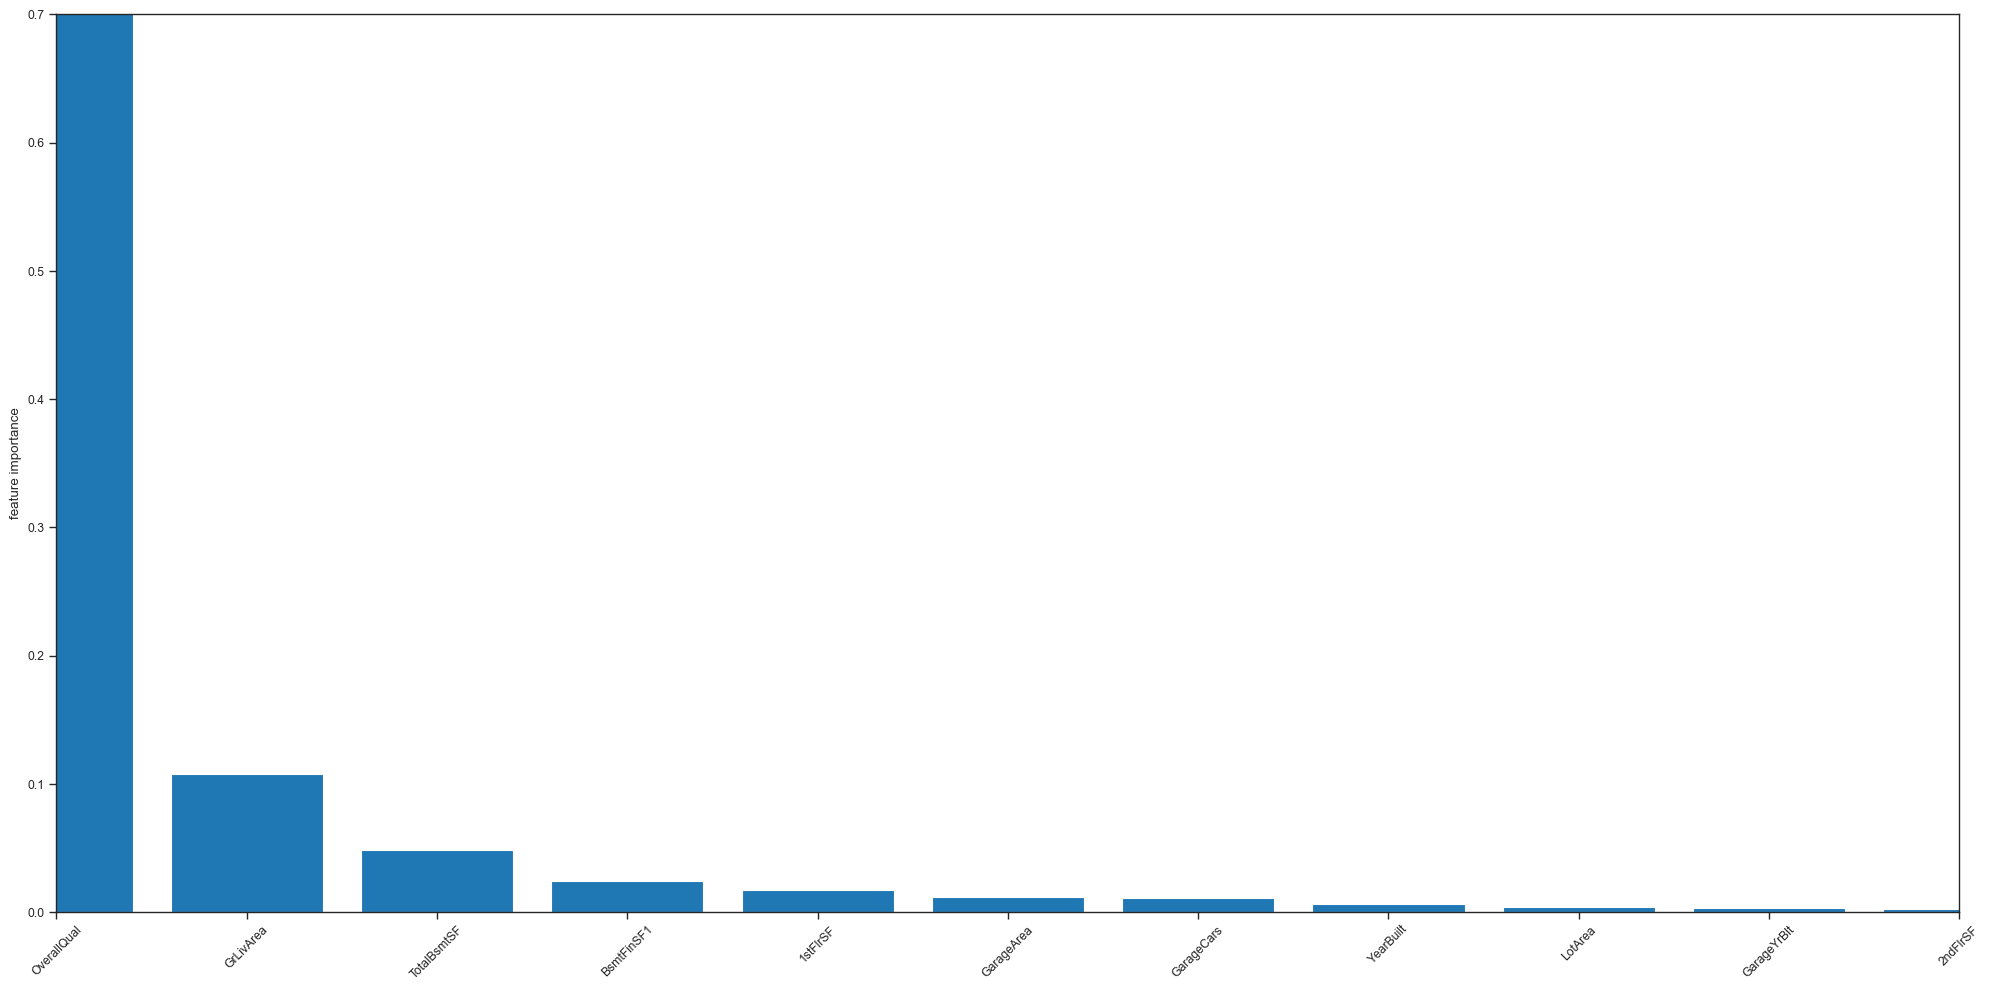

In [32]:
sns.set_context("paper")
sns.set_style("ticks")
cmn.plot_feature_importance(x_val=X_train, regressor=forest, x_lim=10, y_lim=0.7)
plt.show()

### Correlation Graph 50:50

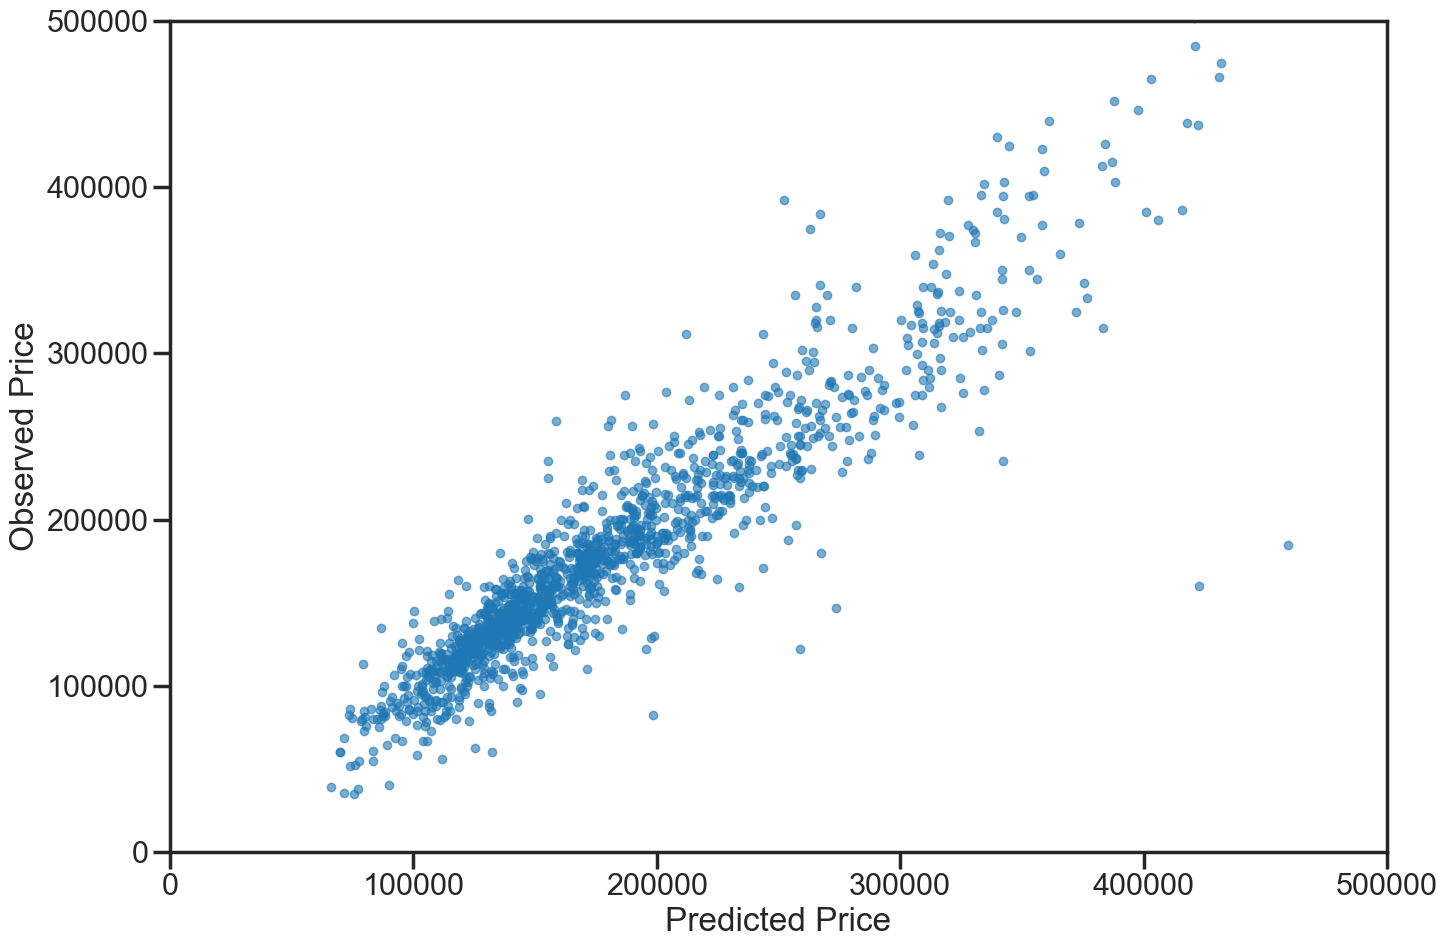

In [33]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_single_scatter(observed=y_train, predicted=y_train_predicted, x_lim=500000, y_lim=500000, size_of_fig=(15,10))

# CrossValidation testing to get best parameters for Random Forest


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Based on the previous cell we can see all the params that RandomForestRegressor uses. We decided to pick a few that we think will have a impact on the results and filled them with a range of values for RandomizedSearchCV to use.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Random Grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
forest = RandomForestRegressor()
forest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest_random.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

This shows the params that would best fit our data using RandomForestRegressor

In [37]:
forest_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

We then take this RandomForestRegressor with the best parameters set and fit the training data

In [38]:
forest = forest_random.best_estimator_
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=42)

This produces a very good score, which we then use to run a prediction for our testing data

In [39]:
print("model score on training data:", forest.score(X_train, y_train))
y_predicted = forest.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9999999997485178


array([125856.5575, 151943.335 , 182550.9975, ..., 174088.4075,
       107834.625 , 240873.39  ])

Export the CSV to be used for weighting

In [40]:
pd.DataFrame(y_predicted).to_csv(f"{cmn.export_data_path}RandomForest_for_weights.csv")

### Feature importance

In [41]:
sns.set_context("poster")
sns.set_style("ticks")

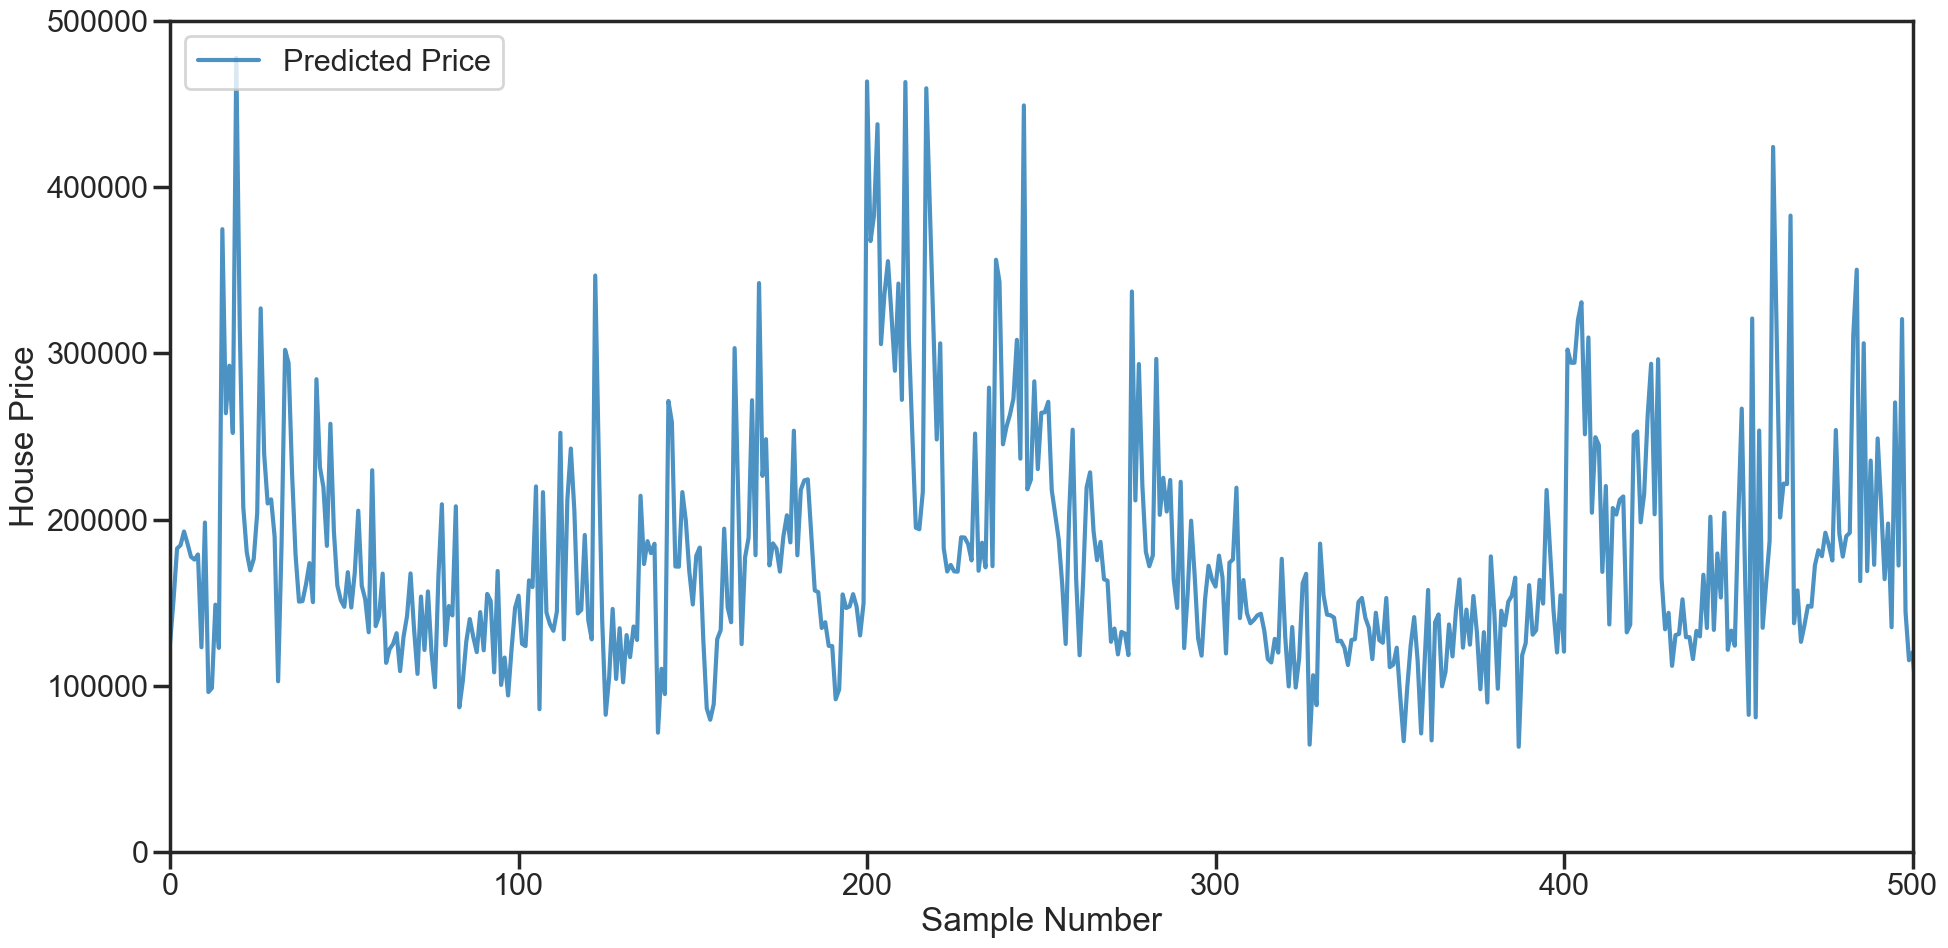

In [42]:
cmn.plot_observed_vs_predicted(predicted=y_predicted, size_of_fig=(20,10), x_lim=500, y_lim=500000)

With the new parameters set, we are able to see a remarkable difference between the feature importance before and after.

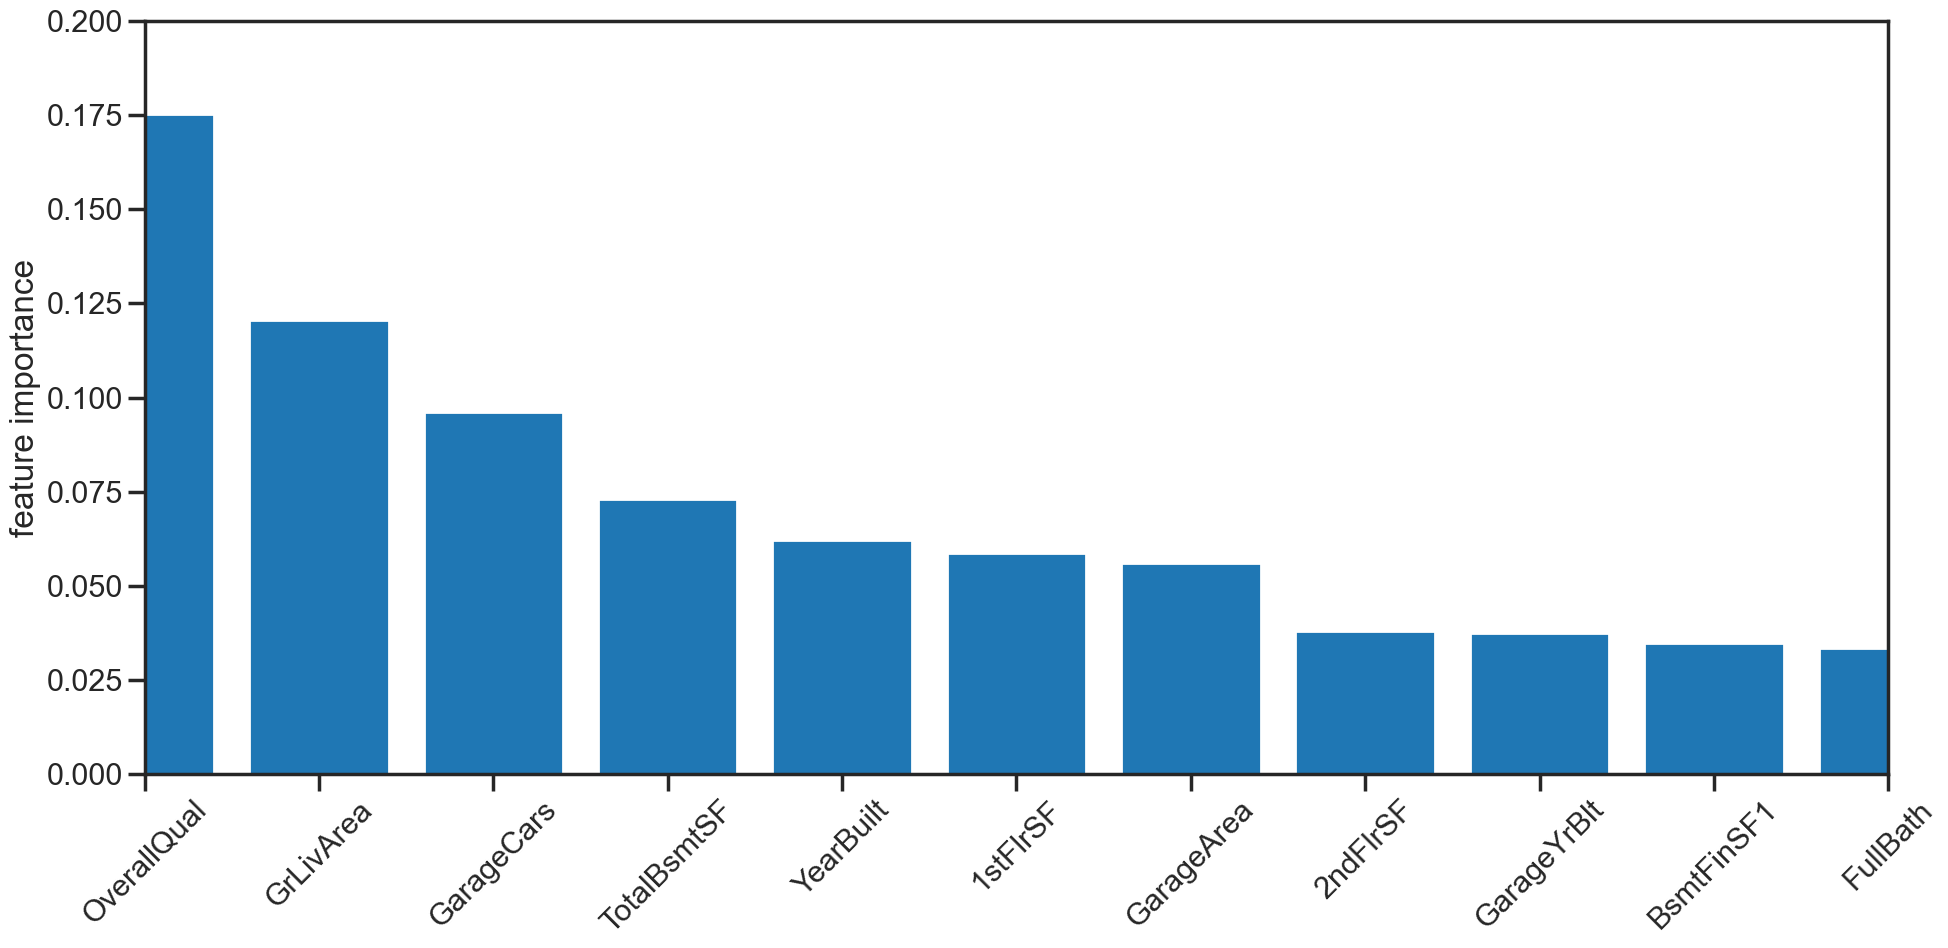

In [43]:
cmn.plot_feature_importance(x_val=X_train, regressor=forest, x_lim=10, y_lim=0.2, fig_size=(20,10))
plt.show()

# Reverse 50:50 with best params

In [44]:
forest = forest_random.best_estimator_
forest.fit(X_test, y_predicted)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=42)

In [45]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 1.0
model score on test data: 0.8549850239565167


In [46]:
y_train_predicted = forest.predict(X_train)
y_train_predicted

array([201605.40564375, 167914.16693125, 213785.525125  , ...,
       196293.39235   , 129067.13806875, 146175.18938125])

In [47]:
pd.DataFrame(y_train_predicted).to_csv(f"{cmn.export_data_path}RandomForestPrediction.csv")

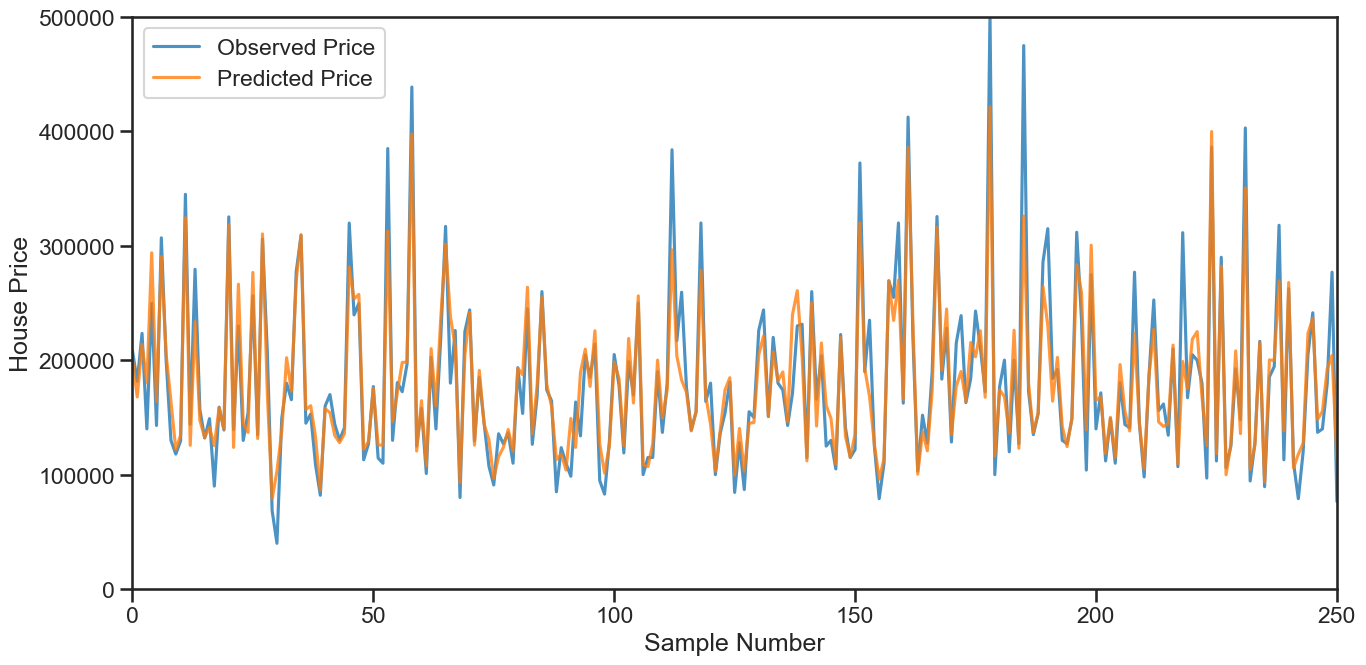

In [51]:
sns.set_context("talk")
sns.set_style("ticks")
cmn.plot_observed_vs_predicted(observed=y_train, predicted=y_train_predicted, x_lim=250, size_of_fig=(14, 7))